In [5]:
import numpy as np 

def regularize(x,t,T):
    m = np.diff(x)/np.diff(t)                             # Slopes of the different increments 
    t_r = np.arange(T)                                    # Regular times
    x_r = np.zeros(len(t_r))                              # Regularized position array 
    s = 0                                                 # Section number
    for i in range(len(t)-1):
        f = np.where(t_r < t[i+1])[0][-1]                 # Find the end of the segment that the values are to be assigned
        x_r[s:f+1] = x[i] + m[i] * (t_r[s:f+1]-t[i])      # Assign the values of the segment
        s = f+1                                           # Assign the beginning of the next segment 
    return(x_r)


def CTRW(T,alpha):
    import numpy as np
    t = []
    x = []
    x.append(0)
    t.append(0)
    while t[-1]<T:
        t.append(t[-1] + (1-np.random.rand())**(-1/alpha))  # Power-law distributed wait times 
        t.append(t[-1] + 1)                                 # The time step after the wait time 
        x.append(x[-1])                                     # Particle stays still during the wait time 
        x.append(x[-1] + np.random.randn())                 # Particle moves after the wait time 
    x = regularize(x,t,T)                                   # Regularize the traejctory
    return(x)

def CTRW_2D(T,alpha):
    import numpy as np
    t = []
    x = []
    y = []
    x.append(0)
    y.append(0)
    t.append(0)
    while t[-1]<T:
        t.append(t[-1] + (1-np.random.rand())**(-1/alpha))  # Power-law distributed wait times 
        t.append(t[-1] + 1)                                 # The time step after the wait time 
        x.append(x[-1])                                     # Particle stays still during the wait time 
        x.append(x[-1] + np.random.randn())                 # Particle moves after the wait time 
        y.append(x[-1])                                     # Particle stays still during the wait time 
        y.append(x[-1] + np.random.randn())                 # Particle moves after the wait time 
    x = regularize(x,t,T)
    y = regularize(y,t,T)
    return(x,y)

def LW(T,alpha):
    import numpy as np
    x = []
    t = []
    x.append(0)
    t.append(0)
    V = 1
    while t[-1]<T:
        dt = (1-np.random.rand())**(-1/(3-alpha))          # Flight time distribution
        t.append(t[-1] + dt)
        x.append(x[-1] + V*np.random.choice([-1,1])*dt)    # Particle moves either right or left during flight
    x = regularize(x,t,T)
    return(x)

def LW_2D(T,alpha):
    import numpy as np
    t = []
    x = []
    y = []
    x.append(0)
    y.append(0)
    t.append(0)
    V = 1
    while t[-1]<T:
        dt = (1-np.random.rand())**(-1/(3-alpha))          # Flight time distribution
        t.append(t[-1] + dt)
        theta = np.random.rand()*2*np.pi
        x.append(x[-1] + V*np.cos(theta)*dt)               # Particle moves randomly in 2D
        y.append(y[-1] + V*np.sin(theta)*dt)               # Particle moves randomly in 2D
    x = regularize(x,t,T)
    y = regularize(y,t,T)
    return(x,y)

def SBM(T,alpha):
    import numpy as np
    from scipy.special import erfcinv
    t = np.arange(np.ceil(T**alpha))**(1/alpha)               # Take the power (alpha) of time
    x = np.cumsum(np.random.randn(int(np.ceil(T**alpha))))    # Regular Brownian motion
    x = regularize(x,t,T)
    return(x)



def SBM_2D(T,alpha):
    import numpy as np
    from scipy.special import erfcinv
    t = np.arange(np.ceil(T**alpha))**(1/alpha)               # Take the power (alpha) of time
    x = np.cumsum(np.random.randn(int(np.ceil(T**alpha))))    # Regular Brownian motion
    y = np.cumsum(np.random.randn(int(np.ceil(T**alpha))))    # Regular Brownian motion
    x = regularize(x,t,T)
    y = regularize(y,t,T)
    return(x,y)

Text(0.5, 1.0, 'SBM Trajectory')

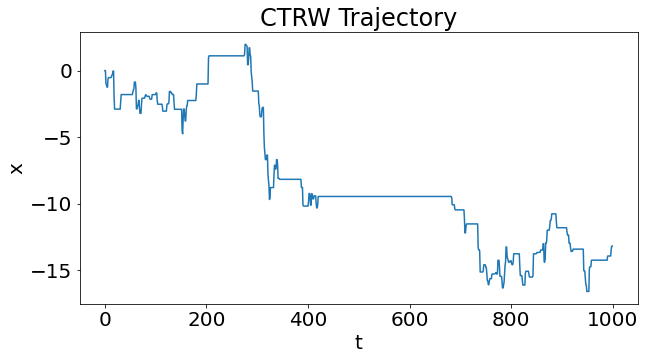

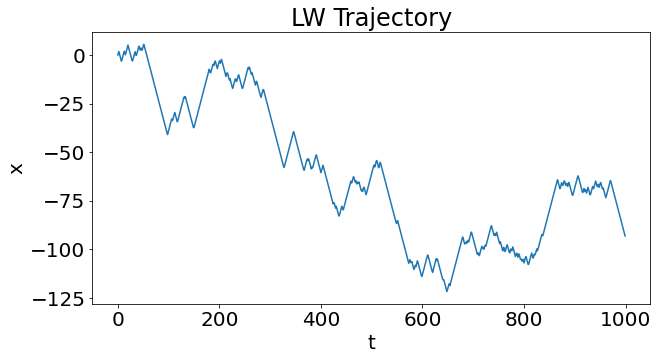

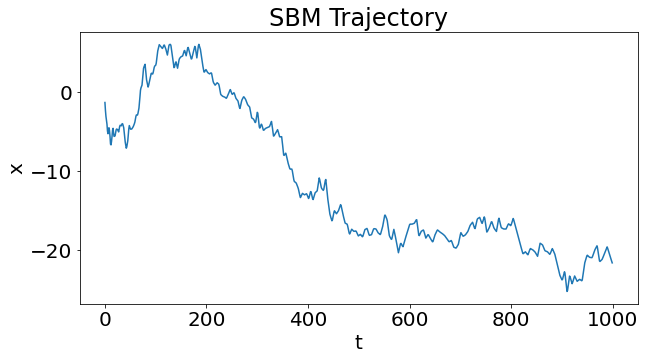

In [23]:
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 20})

plt.figure(figsize=(10,5))
plt.plot(CTRW(1000,0.8))
plt.xlabel('t')
plt.ylabel('x')
plt.title('CTRW Trajectory')


plt.figure(figsize=(10,5))
plt.plot(LW(1000,1.5))
plt.xlabel('t')
plt.ylabel('x')
plt.title('LW Trajectory')

plt.figure(figsize=(10,5))
plt.plot(SBM(1000,0.8))
plt.xlabel('t')
plt.ylabel('x')
plt.title('SBM Trajectory')